In [1]:
# LEITURA E VERIFICAÇÃO DE CORRELAÇÃO USANDO A BIB PANDAS

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# Definir o caminho do arquivo
file_path = 'summary_data.csv'

# LENDO O ARQUIVO EM EXCEL OU EM CSV
if not os.path.exists(file_path):
    df = pd.read_excel('Compilado CaCO3 - estatística - SC e CC - final 1.xlsx', decimal=',', skiprows=2)
    df.to_csv('summary_data.csv', sep=',', index=False)  # Salvando uma versão de menor tamanho em CSV
else:
    df = pd.read_csv('summary_data.csv', decimal=',')



In [3]:
# LIMPAR OS NOMES DAS COLUNAS E CONVERTER DADOS
df.columns = df.columns.str.strip()  # REMOVENDO OS ESPAÇOS EXTRAS DOS NOMES DAS COLUNAS
df = df.apply(pd.to_numeric, errors='coerce')  # CONVERTENDO NÚMEROS EM FLOATS, QUANDO POSSÍVEL


In [4]:
# VERIFICANDO A correlação com a variável de saída principal (exemplo: 'Massa total (mg)')
correlation = df.corr(method='spearman')

print("Correlação com a variável de saída 'Massa total (mg)':")
if 'Vazão de CO2 (ml/min)' in correlation.columns:
    print(correlation['Vazão de CO2 (ml/min)'])
else:
    print("A coluna 'Vazão de CO2 (ml/min)' não foi encontrada nos dados.")


Correlação com a variável de saída 'Massa total (mg)':
Testes realizados no sistema ISDER         NaN
Solução                              -0.061982
Na+                                   0.059475
K+                                         NaN
Mg2+                                  0.196736
Ca2+                                  0.201367
Sr2+                                  0.205571
Ba2+                                  0.141377
Cl-                                   0.059475
SO42-                                -0.020932
Br-                                   0.196366
HCO3-                                 0.143916
Temperatura do ensaio °C              0.122753
Tempo de ensaio (min                 -0.116678
Diametro interno (mm)                -0.265828
Vazão (mL/min)                       -0.144025
Velocidade (m/s)                      0.000000
Intensidade de Campo (T)             -0.029263
Rugosidade da parede (um)            -0.265828
Vazão de N2 (ml/min)                  0.285261
Vazão

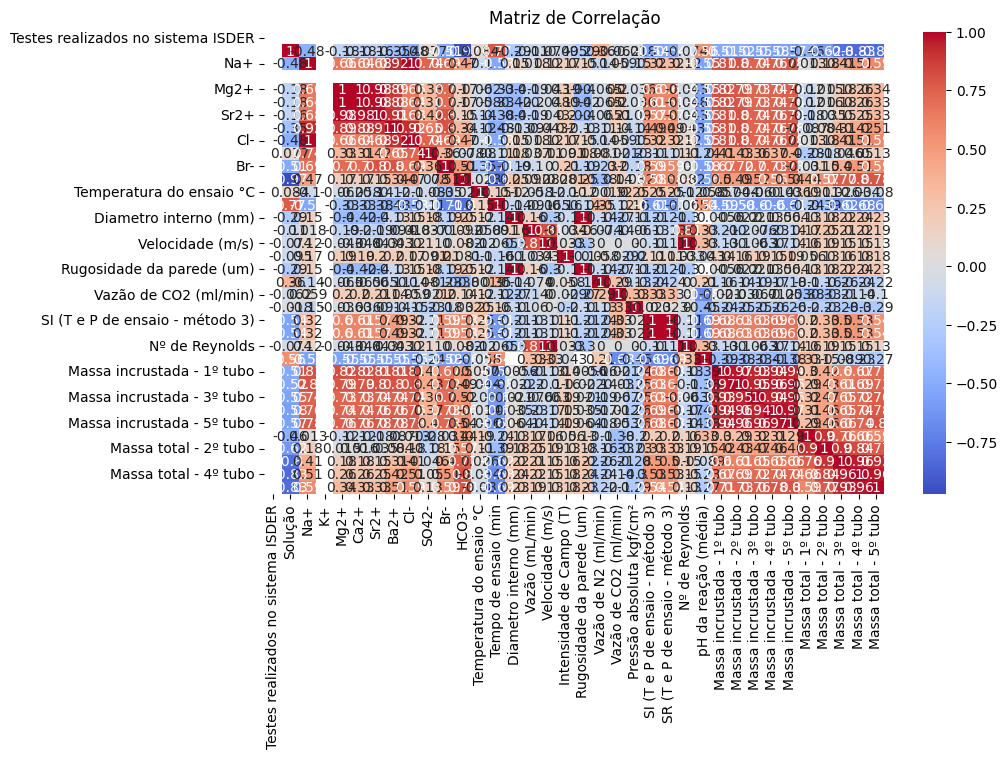

In [6]:
# HEATMAP
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show(block=False)
